<a href="https://colab.research.google.com/github/bakuteyev/interviews/blob/main/ozon_express.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Live-coding

Этот ноутбук содержит в себе несколько практических задач, которые надо реализовать на языке Python. В процессе решения вы демонстрируете свой экран интервьюеру. Если вы что-то забыли, не возбраняется пользоваться вашей любимой поисковой системой при условии полной прозрачности этого процесса для интервьюера (другими словами, поиск должен проходить на том же расшаренном экране). Примерное время решения указано в условии каждой из задач.

# Задача 1: разминка

В группе, состоящей из 23 человек, какова вероятность совпадения дней рождения (число и месяц) хотя бы у двух людей?
<br><b>Примерное время решения</b>: 5-10 минут<br>
<b> Алгоритм решения надо придумать самому</b>

In [1]:
#
# Ваш код здесь
#

p=1/365

In [2]:
n=23

In [3]:
n*(n-1)/2*p

0.6931506849315069

Это неправильное рассуждение. Нужно расчитать вероятность, что в группе не будет совпадений в днях рожденьях.

In [4]:
no_coincedence = 1
for i in range(1, n):
  no_coincedence *= (1-i/365) 
1-no_coincedence

0.5072972343239854

# Задача 2:  алгоритмы

Вам необходимо, используя только стандартные питоновские структуры данных (кортежи, списки, словари), реализовать алгоритм <a href="https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B2_%D1%88%D0%B8%D1%80%D0%B8%D0%BD%D1%83">поиска в ширину</a> на направленном графе и с его помощью найти кратчайший путь из точки start_point в точку end_point. У вас есть код чтения графа из файла sample_graph.tsv в список ребёр, представленных элементами вида [начальная вершина, конечная вершина]. Путь из вершины 12 в вершину 34 для самопроверки - 12, 422, 53, 52, 107, 20, 23, 274, 34.
<br><b>Примерное время решения</b>: 20-30 минут

In [5]:
# загрузка графа и чтение

!wget --no-verbose https://www.dropbox.com/s/e3vy29ciuyhe1sg/sample_graph.tsv
    
graph = []
with open('sample_graph.tsv','r') as f:
    for line in f:
        v = line.split('\t')
        graph.append([int(v[1]),int(v[0])])
graph[:3]

2021-07-05 12:24:11 URL:https://uc66b9313d4f88332eff068c38de.dl.dropboxusercontent.com/cd/0/inline/BRtHdGd_8Dcjfs21T770dhitruOSYZq5kXMQGvJrtR9PzmmGNziGVx42RpMUzfHxscSJwN9WkEIkrHPvan_5b3sVihMr9u-v0jJaWXUK5KqEhkjTtzY3Ec9kkVEGVhun7bmAjt245on-Dd0lY7Xo0XEK/file [672691/672691] -> "sample_graph.tsv.1" [1]


[[2241, 12], [13349, 12], [41873, 12]]

In [6]:
len(graph)

54485

In [7]:
start_point = 12
end_point = 34

In [8]:
nodes = list(set([e[0] for e in graph] + [e[1] for e in graph]))

In [9]:
len(nodes)

54161

In [10]:
from collections import defaultdict

In [11]:
g = defaultdict(list)
for e in graph:
  g[e[0]].append(e[1])

In [12]:
def bfs(g, start, end):
    queue = [[start]]
    if start == end:
        return [start]
    visitted = set()
    while queue:
      path = queue.pop(0)
      current_node = path[-1]
      if current_node not in visitted:
        neighbours = g[current_node]
        for node in neighbours:
            new_path = list(path)
            new_path.append(node)
            queue.append(new_path)
            if node == end:
                return new_path
        visitted.add(current_node)





In [13]:
bfs({1:[2,3], 2:[3,4], 4:[5], 3:[]}, 1, 5)

[1, 2, 4, 5]

In [14]:
bfs(g, start_point, end_point)

[12, 422, 53, 52, 107, 20, 23, 274, 34]

In [15]:
# загрузка обучающей выборки
!wget --no-verbose https://www.dropbox.com/s/kbdpvcgv58ueks7/train.csv

2021-07-05 12:24:12 URL:https://ucbcf7a628c5d74cac4c526c9882.dl.dropboxusercontent.com/cd/0/inline/BRu_qVKZU5PNuM92mAGtRVlUlj4JjqtIw7e5_nG_2reNZJ6wQ1erxUd2e_QAXfboHUOboRKnGiIaRfPRWKrE3GtXlyWwhKabmDiSU-5wvS7XS2Gk3MV1jVyFlcqwnQgmQ5t8sH5gMaG3Z5VHhRm5o0vs/file [61194/61194] -> "train.csv.2" [1]


# Задача 3: ML

Ниже написан код решения задачи предсказания вероятности выжить на <a href="https://www.kaggle.com/c/titanic">Титанике</a>. Вам нужно:<br>
<ol>
<li>Исправить ошибки в решении <br>
<li>Применяя известные вам способы предобработки данных и алгоритмы машинного обучения, добиться значения целевой метрики (accuracy) > 0.8 на зафиксированной с помощью random_state тестовой выборке. 
<li><b>Нельзя</b>: менять test_size и random_state в train_test_split, удалять строки из train.<br>
</ol>
<b>Описание признаков</b>:

PassengerId — идентификатор пассажира<br>
Survived — поле, в котором указано, спасся человек (1) или нет (0)<br>
Pclass — класс билета (3 - самые дешёвые билеты)<br>
Name — имя пассажира<br>
Sex — пол пассажира<br>
Age — возраст<br>
SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сеcтры)<br>
Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)<br>
Ticket — номер билета<br>
Fare — цена билета<br>
Cabin — каюта<br>
Embarked — порт посадки (C — Cherbourg, Q — Queenstown, S — Southampton)<br>

<br><b>Примерное время решения</b>: 30 минут

In [16]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import 
train = pd.read_csv('train.csv')
y = train['Survived']


In [17]:
train = train.drop(['Survived', 'PassengerId', 'Name'], axis=1)
train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,female,19.0,0,0,112053,30.0000,B42,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,26.0,0,0,111369,30.0000,C148,C


In [18]:
# !pip install catboost

In [30]:
from catboost import CatBoostClassifier, Pool, metrics, cv
categorical_features_indices = np.where(train.dtypes != np.float)[0]

train.fillna(-999, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=5757)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5757)

model = CatBoostClassifier(random_seed=1, custom_loss=[metrics.Accuracy()])
model.fit(X_train, y_train, verbose=False, eval_set=(X_val, y_val),
cat_features=categorical_features_indices)


In [31]:
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.8435754189944135

In [32]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})
cv_data = cv(
    Pool(train, y, cat_features=categorical_features_indices),
    cv_params,  verbose=False,
)

In [33]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

Best validation accuracy score: 0.82±0.01 on step 273


# Логистические задачи
Очень часто логистические задачи можно формализовать математически в виде оптимизациии функции на множестве заданном системой уравнение или неравенств. 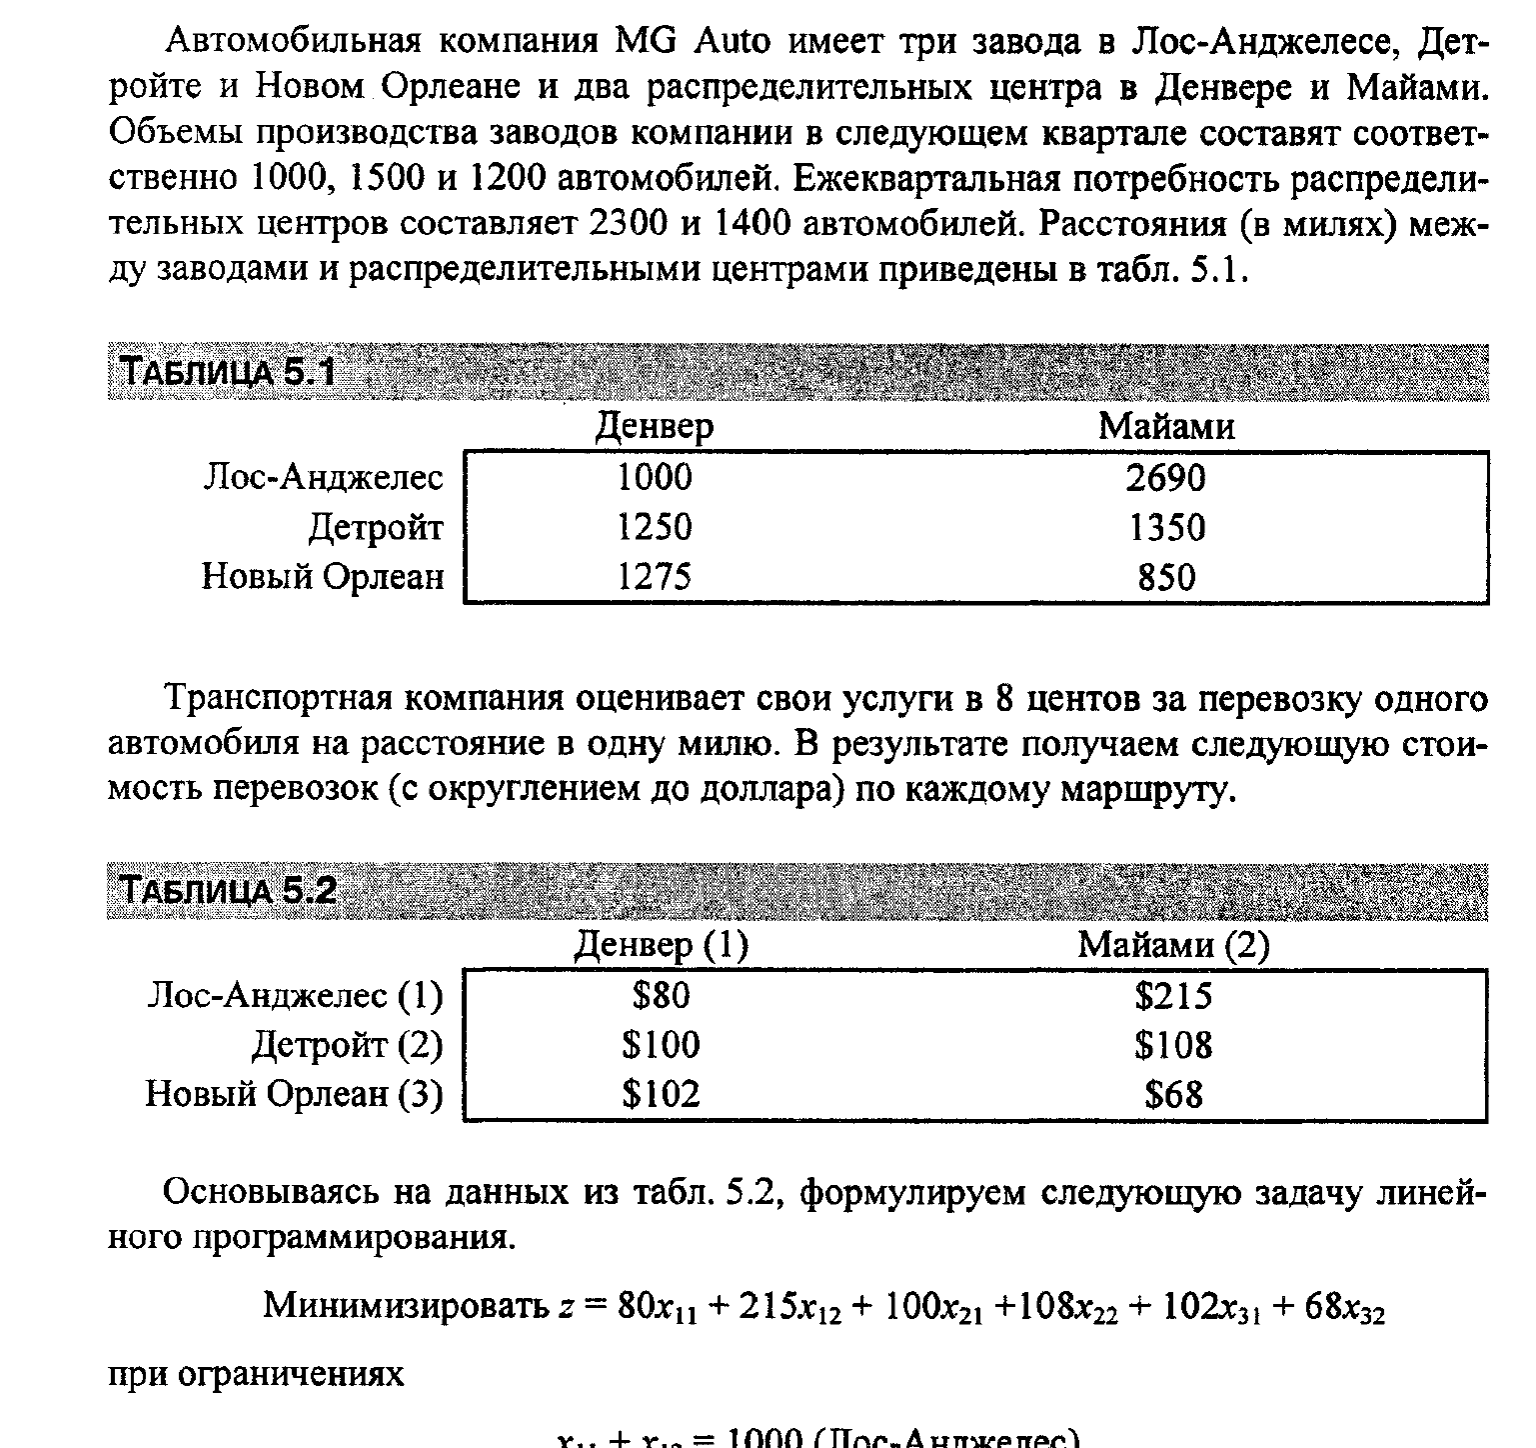

Выше представлен соответствующий академический пример. Типичными инструментами решения подобных задач являются линейное/нелинейное программирование. 

В случае введения неопределенности задачи являются стохастическими. Часто такие задачи можно сформудировать с помощью марковских процессов.

Дополнительными практическими инструментами являются различные виды компьбтернго моделирования, в частности агентное моделирование. Одним из популярных инструментов для этого является AnyLogic.